In [194]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
os.makedirs('figures', exist_ok=True)

In [195]:
alpha = 0
def temporal_gate(t, tau, s, r_on):
    phi_t = ((t - s) % tau) / tau
    
    if phi_t < 0.5 * r_on:
        k_t = 2 * phi_t / r_on
    elif 0.5 * r_on <= phi_t <= r_on:
        k_t = 2 - 2 * phi_t / r_on
    else:
        k_t = 0
    return k_t

In [196]:
def get_df():
    df = pd.DataFrame(columns = ['Time', 'Temporal Gate Activation', 'Period', 'Shift', 'Open Ratio'])

    taus = [5.0, 10.0, 15.0]
    ss = [0.0, 5.0, 10.0]
    r_ons = [0.2, 0.4, 0.6]
    ts = np.linspace(0, 60, 121)
    ys = []

    for tau in taus:
        for s in ss:
            for r_on in r_ons:
                for t in ts:
                    df = df.append({
                        'Time': t,
                        'Temporal Gate Activation': temporal_gate(t, tau, s, r_on),
                        'Period': tau,
                        'Shift': s,
                        'Open Ratio': r_on
                    }, sort=False, ignore_index=True)
    return df

df = get_df()

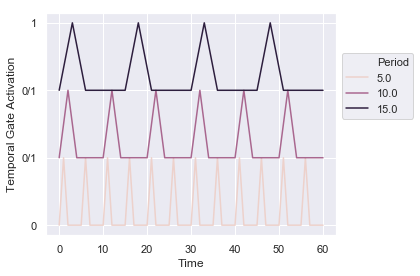

In [209]:
tau_mask = df.loc[df['Shift'] == 0.0]
tau_mask = tau_mask.loc[tau_mask['Open Ratio'] == 0.4]
tau_mask.loc[tau_mask['Period'] == 10.0, 'Temporal Gate Activation'] += 1
tau_mask.loc[tau_mask['Period'] == 15.0, 'Temporal Gate Activation'] += 2

plt.figure()
sns.lineplot(x='Time', y='Temporal Gate Activation', data=tau_mask, hue='Period', legend='full')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.yticks([0, 1, 2, 3], ["0","0/1", "0/1", "1"])
plt.tight_layout()
plt.savefig('figures/temp_gate_tau.png', dpi=160)

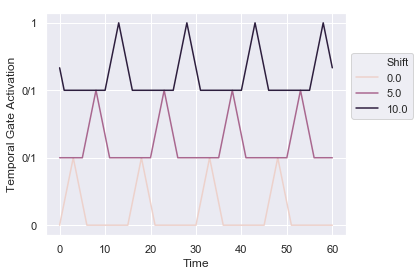

In [210]:
s_mask = df.loc[df['Period'] == 15.0]
s_mask = s_mask.loc[s_mask['Open Ratio'] == 0.4]
s_mask.loc[s_mask['Shift'] == 5.0, 'Temporal Gate Activation'] += 1
s_mask.loc[s_mask['Shift'] == 10.0, 'Temporal Gate Activation'] += 2

plt.figure()
sns.lineplot(x='Time', y='Temporal Gate Activation', data=s_mask, hue='Shift', legend='full')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.yticks([0, 1, 2, 3], ["0","0/1", "0/1", "1"])
plt.tight_layout()
plt.savefig('figures/temp_gate_s.png', dpi=160)

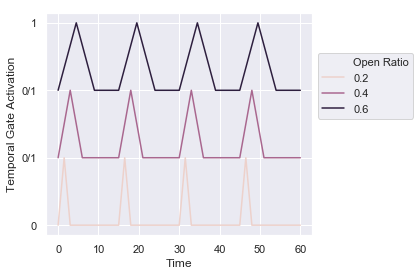

In [211]:
r_mask = df.loc[df['Shift'] == 0.0]
r_mask = r_mask.loc[r_mask['Period'] == 15.0]
r_mask.loc[r_mask['Open Ratio'] == 0.4, 'Temporal Gate Activation'] += 1
r_mask.loc[r_mask['Open Ratio'] == 0.6, 'Temporal Gate Activation'] += 2

plt.figure()
sns.lineplot(x='Time', y='Temporal Gate Activation', data=r_mask, hue='Open Ratio', legend='full')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.yticks([0, 1, 2, 3], ["0","0/1", "0/1", "1"])
plt.tight_layout()
plt.savefig('figures/temp_gate_r.png', dpi=160)

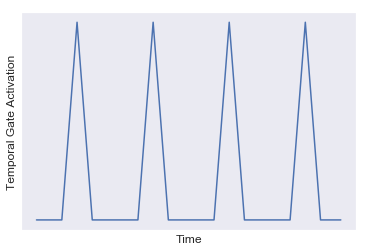

In [220]:
one_love = df.loc[df['Shift'] == 5.0]
one_love = one_love.loc[one_love['Open Ratio'] == 0.4]
one_love = one_love.loc[one_love['Period'] == 15.0]


plt.figure()
sns.lineplot(x='Time', y='Temporal Gate Activation', data=one_love, legend='full')
plt.yticks([])
plt.xticks([])
plt.savefig('figures/temp_gate.png', dpi=160)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


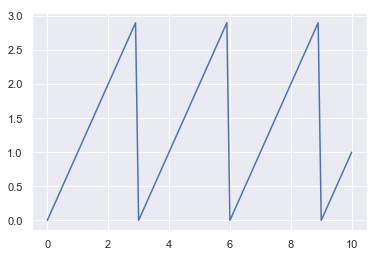

In [234]:
x = np.linspace(0, 10, 101)
y = x % 3
print(x)
sns.lineplot(x=x, y=y)